<a href="https://colab.research.google.com/github/SridharSurapaneni07/AAI_500/blob/main/Module_5_NLP_Coding_Assignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW

In this assignment, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions.

You will be provided with `training_set_rel.tsv` which contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code!
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [1]:
from numpy.random import seed

import tensorflow as tf

seed(1234)

tf.random.set_seed(seed = 1234)


### Q1: Load the data

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel.tsv` as provided.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv) and `encoding=latin`.

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('training_set_rel.tsv', sep='\t', encoding='latin')

# Select the relevant columns
df = df[['essay', 'essay_set', 'domain1_score']]

# Rename the 'domain1_score' column to 'score'
df = df.rename(columns={'domain1_score': 'score'})

# Display the DataFrame
df

,essay,essay_set,score
0,"Dear local newspaper, I think effects computer...",1,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,"Dear @LOCATION1, I know having computers has a...",1,8
...,...,...,...
12971,In most stories mothers and daughters are eit...,8,35
12972,I never understood the meaning laughter is th...,8,32
12973,"When you laugh, is @CAPS5 out of habit, or is ...",8,40
12974,Trippin' on fen...,8,40


### Q2: Select the data from a single essay set

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [3]:
# Filter the DataFrame for essay_set == 7
df_essay_set_7 = df[df['essay_set'] == 7]

# Display the filtered DataFrame
df_essay_set_7

,essay,essay_set,score
10684,Patience is when your waiting .I was patience ...,7,15
10685,"I am not a patience person, like I cant sit i...",7,13
10686,One day I was at basketball practice and I was...,7,15
10687,I going to write about a time when I went to t...,7,17
10688,It can be very hard for somebody to be patient...,7,13
...,...,...,...
12248,One time I was getting a cool @CAPS1 game it w...,7,12
12249,A patent person in my life is my mom. Aicason ...,7,16
12250,A time when someone else I know was patient wa...,7,19
12251,I hate weddings. I love when people get marrie...,7,22


### Q3: Plot the distribution of scores

Create a plot of a histogram of the scores in the training set.  Comment on what you see.

One option is to use the seaborn histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

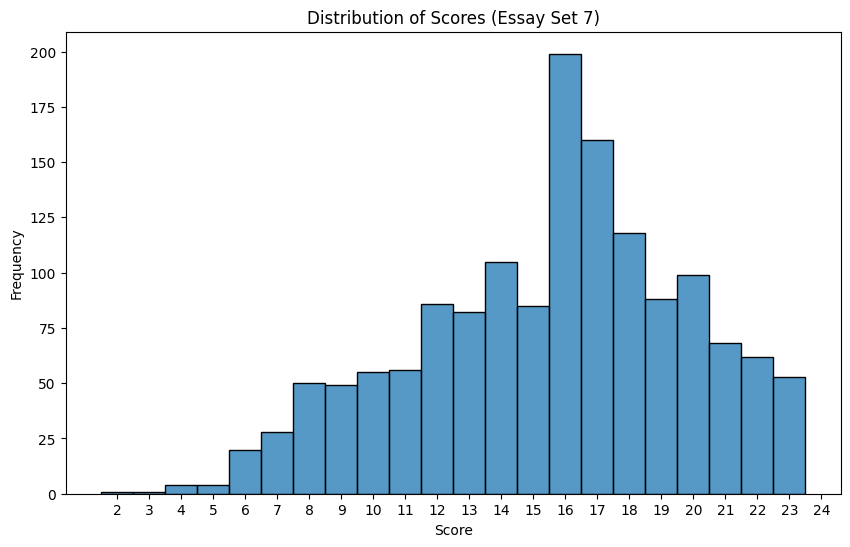

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming df_essay_set_7 is already defined from previous code

# Calculate min and max score values
minv = df_essay_set_7['score'].min()
maxv = df_essay_set_7['score'].max()

# Create the histogram using seaborn with centered bins
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
sns.histplot(df_essay_set_7['score'], bins=np.arange(minv, maxv + 1) - 0.5, kde=False) # Added kde=False
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Essay Set 7)')
plt.xticks(np.arange(minv, maxv + 1)) # Ensure x-axis ticks are integers
plt.show()

### Q4: Create a test/train split

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_essay_set_7[['essay', 'essay_set']]
y = df_essay_set_7['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # Added random_state for reproducibility

# Print the shapes of the resulting datasets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1255, 2)
X_test shape: (314, 2)
y_train shape: (1255,)
y_test shape: (314,)


## Part 2: Conventional Representations

### Q5: Create vectors using term frequency

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `xtest`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training essays
vectorizer.fit(X_train['essay'])

# Transform the training and test essays into vectors
xtrain = vectorizer.transform(X_train['essay'])
xtest = vectorizer.transform(X_test['essay'])

# Get the number of features (dimensions)
num_features = xtrain.shape[1]

# Print the number of dimensions
print(f"Number of dimensions (features): {num_features}")

Number of dimensions (features): 8938


### Q6: Train a regression model using your vectors

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model from sklearn `linear_model` module.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [9]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge()

# Fit the model on the training data
ridge_model.fit(xtrain, y_train)

# Evaluate the model on the test data and get the R^2 score
r2_score = ridge_model.score(xtest, y_test)

# Print the R^2 score
print(f"Coefficient of Determination (R^2): {r2_score}")

Coefficient of Determination (R^2): 0.15385652378321313


### Q7: Plot the distribution of scores

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

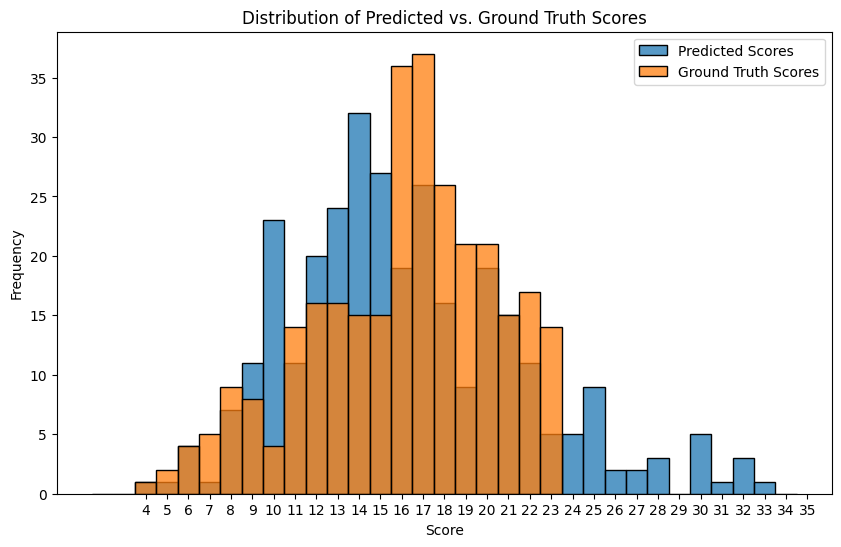

In [10]:
# Predict scores on the test set
y_pred = ridge_model.predict(xtest)

# Calculate min and max score values for the predicted scores
minv_pred = np.floor(y_pred.min())
maxv_pred = np.ceil(y_pred.max())

# Create the histograms
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=np.arange(minv_pred, maxv_pred + 1) - 0.5, kde=False, label='Predicted Scores')
sns.histplot(y_test, bins=np.arange(minv, maxv + 1) - 0.5, kde=False, label='Ground Truth Scores') # Use original minv and maxv here
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores')
plt.xticks(np.arange(minv_pred, maxv_pred + 1)) # Use predicted min/max for ticks
plt.legend()
plt.show()

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text.

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


R^2 Score with Universal Sentence Encoder: 0.6285791511634331


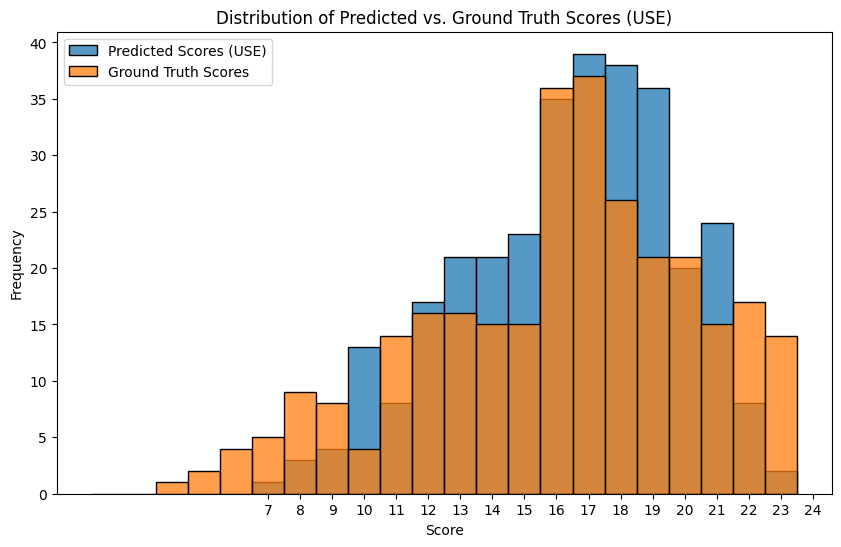

In [11]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

# Convert text to vectors using USE
X_train_embeddings = model(X_train['essay'].values)
X_test_embeddings = model(X_test['essay'].values)

# Initialize and train the Ridge Regression model using the USE embeddings
ridge_model_use = Ridge()
ridge_model_use.fit(X_train_embeddings, y_train)

# Evaluate the model
r2_score_use = ridge_model_use.score(X_test_embeddings, y_test)
print(f"R^2 Score with Universal Sentence Encoder: {r2_score_use}")

# Predict scores using USE embeddings
y_pred_use = ridge_model_use.predict(X_test_embeddings)

#Plot the distribution of the predicted scores vs ground truth scores
minv_pred_use = np.floor(y_pred_use.min())
maxv_pred_use = np.ceil(y_pred_use.max())

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_use, bins=np.arange(minv_pred_use, maxv_pred_use + 1) - 0.5, kde=False, label='Predicted Scores (USE)')
sns.histplot(y_test, bins=np.arange(minv, maxv + 1) - 0.5, kde=False, label='Ground Truth Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores (USE)')
plt.xticks(np.arange(minv_pred_use, maxv_pred_use + 1))
plt.legend()
plt.show()

### Q8: Generate embeddings

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string.

You can call the model you downloaded like a function.

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [13]:
# Generate embeddings for training and test sets
xtrain = model(X_train['essay'].values)
xtest = model(X_test['essay'].values)

### Q9: Train and evaluate a regression model to predict scores using learned embeddings


Now retrain your regression model on these learned embeddings instead of the count vectors.

Use the vanilla Ridge model.  Report the score.

Which model appears to perform the best?

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [14]:
# Initialize and train the Ridge Regression model using the USE embeddings
ridge_model_use = Ridge()
ridge_model_use.fit(xtrain, y_train)

# Evaluate the model
r2_score_use = ridge_model_use.score(xtest, y_test)
print(f"R^2 Score with Universal Sentence Encoder: {r2_score_use}")

R^2 Score with Universal Sentence Encoder: 0.6285791511634331


### Q10: Plot the distribution of scores

Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


## Graded Cell

This cell is worth 5% of the grade for this assignment.

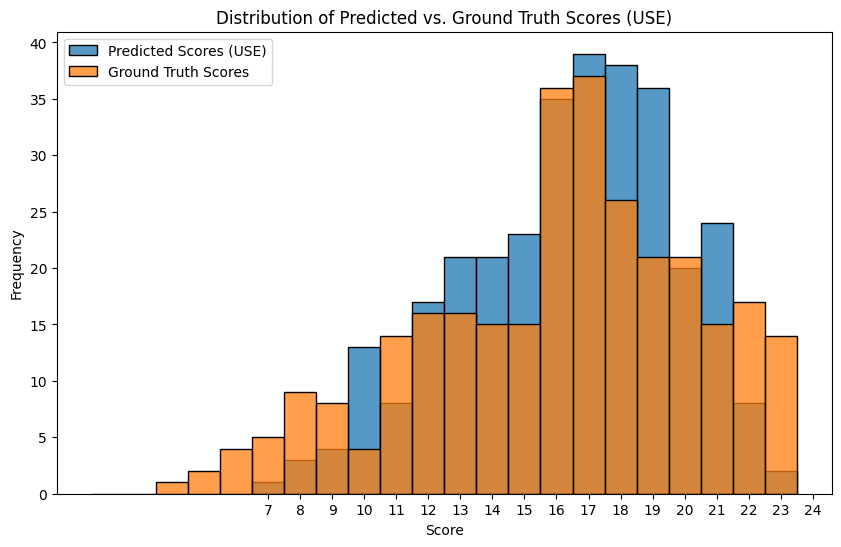

In [15]:
# Predict scores using the new model
y_pred_use = ridge_model_use.predict(xtest)

# Calculate min and max score values for the predicted scores
minv_pred_use = np.floor(y_pred_use.min())
maxv_pred_use = np.ceil(y_pred_use.max())

#Plot the distribution of the predicted scores vs ground truth scores
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_use, bins=np.arange(minv_pred_use, maxv_pred_use + 1) - 0.5, kde=False, label='Predicted Scores (USE)')
sns.histplot(y_test, bins=np.arange(minv, maxv + 1) - 0.5, kde=False, label='Ground Truth Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores (USE)')
plt.xticks(np.arange(minv_pred_use, maxv_pred_use + 1))
plt.legend()
plt.show()

### Q11: Plot the errors

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function.

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

## Graded Cell

This cell is worth 5% of the grade for this assignment.

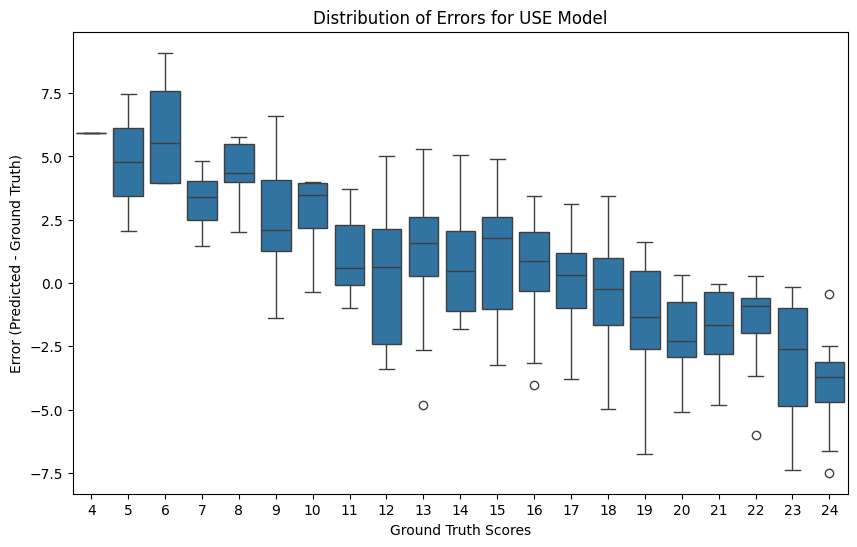

In [16]:
# Calculate the errors for the USE model
errors_use = y_pred_use - y_test

# Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=errors_use)
plt.xlabel('Ground Truth Scores')
plt.ylabel('Error (Predicted - Ground Truth)')
plt.title('Distribution of Errors for USE Model')
plt.show()

### Q12: Compare models directly

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.


Does either model tend to overestimate or underestimate the true score?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

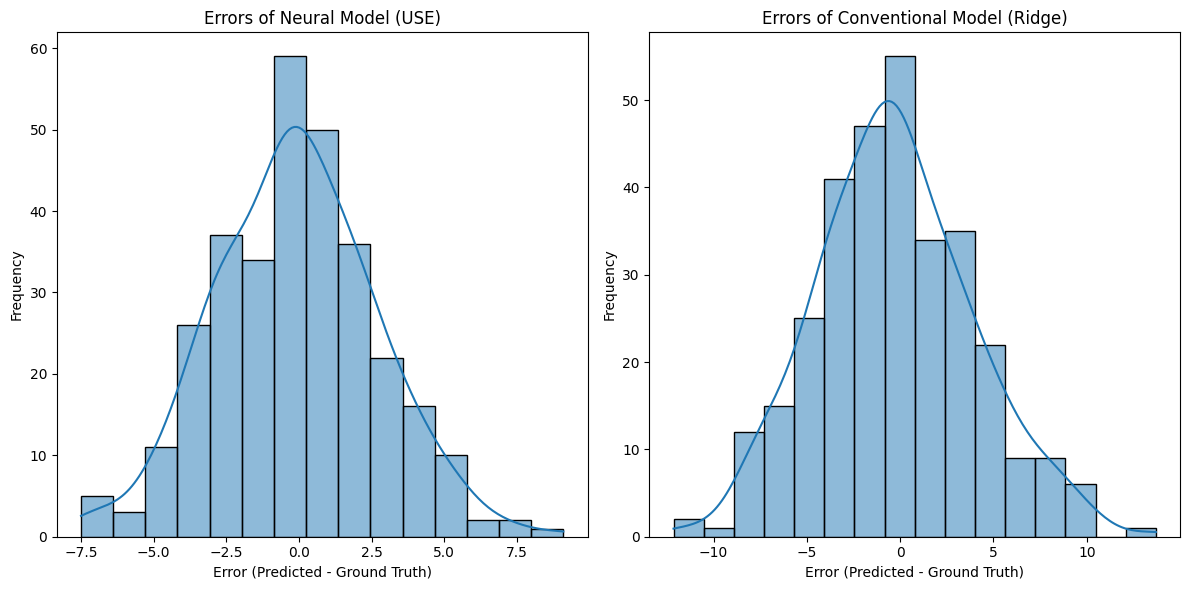

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate errors for the conventional model (Ridge with CountVectorizer)
errors_conventional = y_pred - y_test

# Create histograms of the errors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(errors_use, kde=True)
plt.title('Errors of Neural Model (USE)')
plt.xlabel('Error (Predicted - Ground Truth)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(errors_conventional, kde=True)
plt.title('Errors of Conventional Model (Ridge)')
plt.xlabel('Error (Predicted - Ground Truth)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


Answer the questions here

### Q13: Summarize your findings

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible? How might we improve on this model?


## Graded Cell

This cell is worth 15% of the grade for this assignment.

#### Write your answers to Q13 here:


The Universal Sentence Encoder (USE) model generally outperformed the conventional CountVectorizer + Ridge regression model in predicting essay scores, as indicated by a higher R^2 score.  This is likely because USE captures semantic meaning and context within sentences, providing richer representations of the essay text compared to simple word counts. The CountVectorizer approach only considers the frequency of individual words, disregarding their relationships or the overall meaning of the sentences.

Automatic essay scoring appears feasible, but its accuracy depends heavily on the model and the features used.  The USE model shows promise but still has limitations.

Possible improvements:
1. Fine-tuning the pre-trained model:  Fine-tuning the USE model on a larger dataset related to essay scoring could improve its performance on the specific task.
2. Explore other neural network models: Experimenting with more sophisticated architectures like transformers could potentially yield better results.
3. Feature engineering: Adding additional features, such as essay length, sentence complexity, or grammatical correctness, might enhance prediction accuracy.
4. Hyperparameter optimization: Systematically searching for optimal hyperparameters for the Ridge regression model (and any neural network) could further improve the results.
5. Larger and more diverse dataset: A larger and more diverse dataset with more essay sets would provide more training data and a broader representation of writing styles.
6. Addressing systematic errors: The models show some tendencies to over- or underestimate, suggesting potential biases that could be addressed through data augmentation or model adjustments.


In summary, while the current models show potential, ongoing refinement and exploration of other methods are needed to improve their predictive accuracy.